In [83]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
from IPython import display
import csv
from scipy.signal import butter, lfilter

In [71]:
data = []
with open("data/audio_data_2.csv", 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(int(row['y']))  # Convert to int if y is numeric
    

In [72]:
data

[1,
 8,
 7,
 4,
 6,
 8,
 11,
 5,
 12,
 12,
 13,
 20,
 16,
 16,
 17,
 20,
 16,
 16,
 13,
 11,
 8,
 9,
 13,
 12,
 10,
 8,
 3,
 8,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 16,
 27,
 32,
 16,
 0,
 0,
 0,
 0,
 5,
 17,
 5,
 0,
 0,
 0,
 0,
 1,
 13,
 26,
 27,
 20,
 3,
 0,
 3,
 16,
 24,
 27,
 18,
 11,
 11,
 7,
 3,
 5,
 4,
 18,
 20,
 24,
 22,
 19,
 28,
 25,
 17,
 8,
 8,
 15,
 21,
 23,
 16,
 2,
 8,
 8,
 6,
 7,
 11,
 17,
 22,
 20,
 15,
 0,
 0,
 0,
 0,
 0,
 2,
 6,
 8,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 10,
 9,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 8,
 1,
 0,
 0,
 0,
 0,
 0,
 8,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 11,
 12,
 6,
 0,
 0,
 0,
 2,
 17,
 14,
 13,
 15,
 13,
 11,
 3,
 4,
 15,
 30,
 33,
 27,
 19,
 16,
 15,
 11,
 17,
 20,
 23,
 25,
 17,
 11,
 0,
 0,
 0,
 0,
 9,
 8,
 7,
 9,
 0,
 0,
 0,
 2,
 0,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 8,
 8,
 9,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 2,
 10,
 6,


In [73]:
len(data)

79579

In [74]:
data = np.array(data, dtype=np.float32)

In [75]:
display.Audio(data, rate=40e3)

In [76]:
resampled = librosa.resample(data, orig_sr=40e3, target_sr=16e3)

In [78]:
display.Audio(resampled[int(3e3):int(19e3)], rate=16e3)

In [80]:
selected = resampled[int(6e3):int(22e3)]

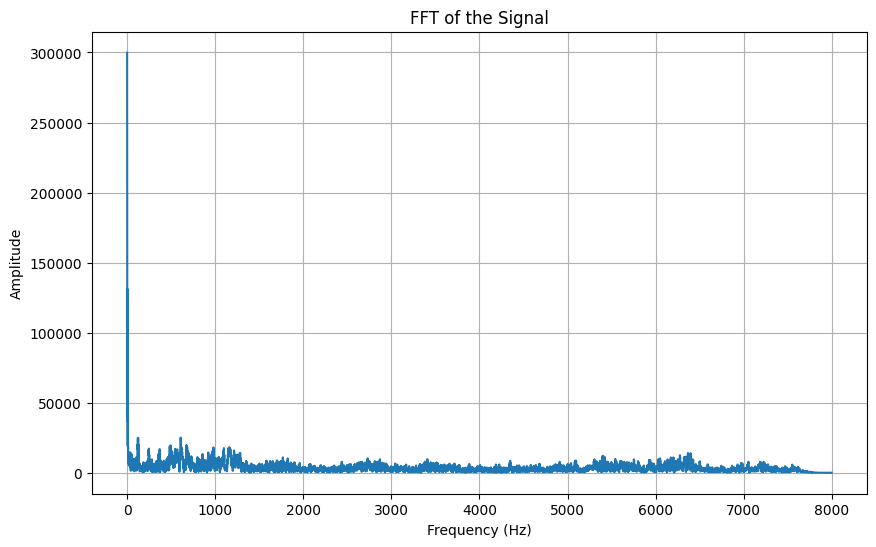

In [64]:
fft_result = np.fft.fft(selected)
fft_freqs = np.fft.fftfreq(len(selected), d=1/16000)  # Frequency bins

# Plot the FFT
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs[:16000 // 2], np.abs(fft_result)[:16000 // 2])  # One-sided spectrum
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [134]:
selected /= np.max(selected)

# Filter raw data with bufferworth filter

In [140]:
fs = 16e3
cutoff = 4e3
nyquist = 0.5 * fs 
normal_cutoff = cutoff / nyquist
b, a = butter(3, normal_cutoff, btype='lowpass', analog=False)

y = lfilter(b, a, selected)
y = [0 if item is None else item for item in y]
y = np.array(y, dtype=np.float32)

In [141]:
contains_none = any(item is None for item in y)

print(contains_none)

False


# Highpass filter

In [150]:
fs = 16e3
cutoff = 200
nyquist = 0.5 * fs 
normal_cutoff = cutoff / nyquist
b, a = butter(6, normal_cutoff, btype='highpass', analog=False)

y_highpass = lfilter(b, a, y)
y_highpass = [0 if item is None else item for item in y_highpass]
y_highpass= np.array(y_highpass, dtype=np.float32)

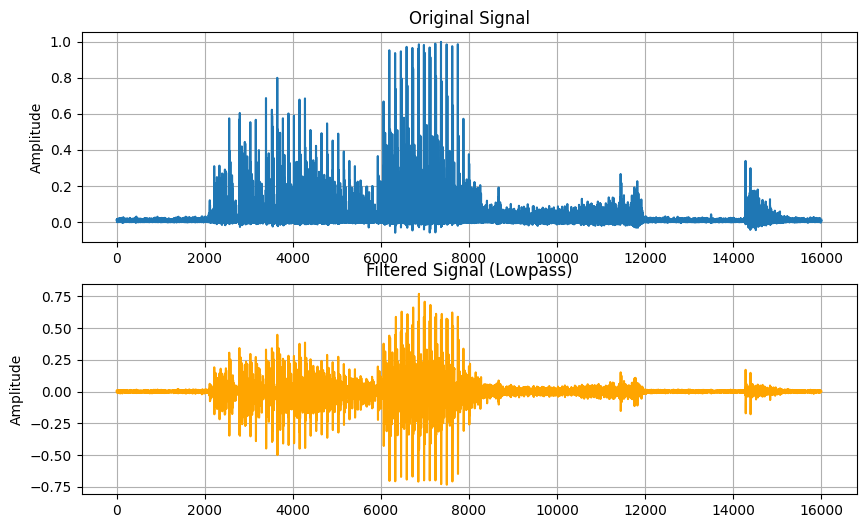

In [151]:
# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(selected, label='Original Signal')
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(y_highpass, label='Filtered Signal', color='orange')
plt.title('Filtered Signal (Lowpass)')
plt.ylabel('Amplitude')
plt.grid()

In [152]:
display.Audio(y_highpass, rate=16e3)

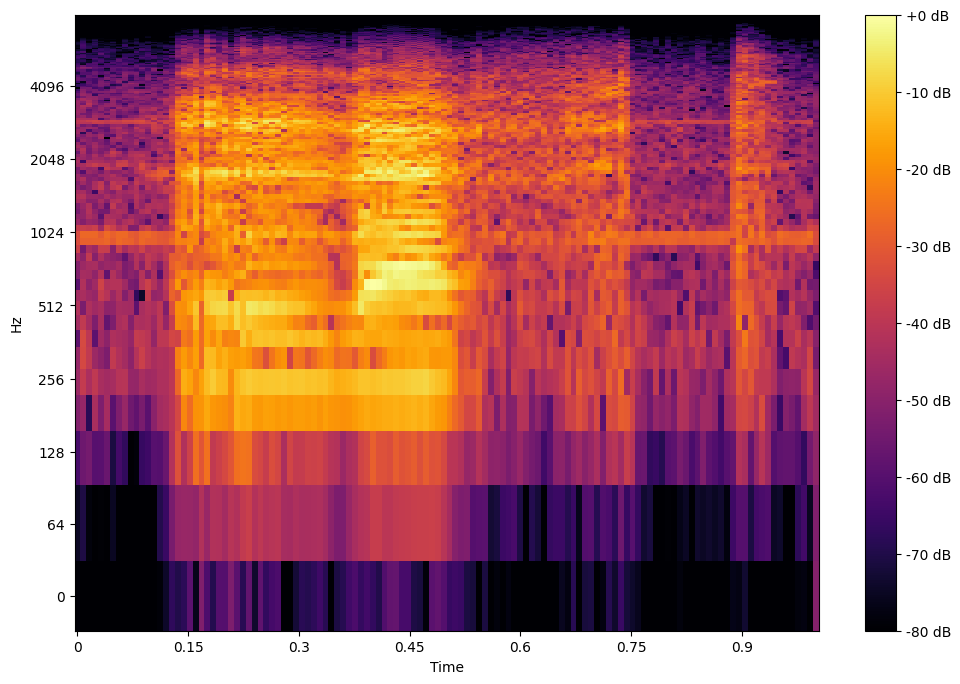

In [153]:
D = librosa.stft(y_highpass, n_fft=256, hop_length=128, window='hann')

# Convert the complex-valued STFT to a magnitude spectrogram
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# Plot the spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, x_axis='time', y_axis='log', sr=16000, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

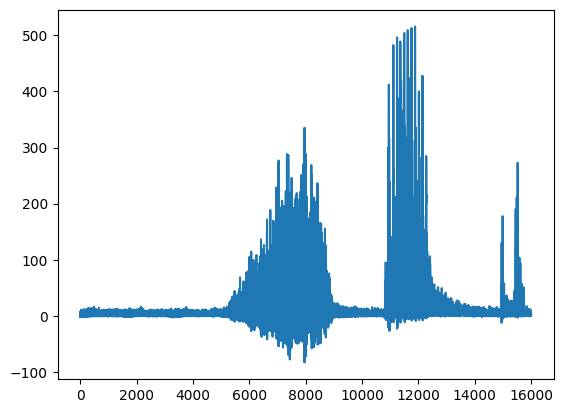

In [61]:
plt.plot(selected)